In [ ]:
from google.colab import drive # untuk menghubungkan ke dalam drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
base_dir ='/content/drive/MyDrive/Dataset' # menyimpan folder praktikum ke dalam base_dir 

train_dir = os.path.join(base_dir, 'train') # menghubungkan train_ dir dengan base_dir dengan folder train
test_dir = os.path.join(base_dir, 'test') # sama

train_jambu_dir = os.path.join(train_dir, 'daun_jambubiji') # menghubungkan train_ benign_dir dengan train_dir dengan folder benign
train_seledri_dir = os.path.join(train_dir, 'daun_seledri') # sama

test_jambu_dir = os.path.join(test_dir, 'test_jambubiji') # menghubungkan test_ benign_dir dengan test_dir dengan folder benign
test_seledri_dir = os.path.join(test_dir, 'test_seledri')# sama

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_jambu_dir)[:10])
print(os.listdir(train_seledri_dir)[:10])

['jambuBiji_(3).jpg', 'jambuBiji_(32).jpg', 'jambuBiji_(31).jpg', 'jambuBiji_(27).jpg', 'jambuBiji_(30).jpg', 'jambuBiji_(29).jpg', 'jambuBiji_(28).jpg', 'jambuBiji_(26).jpg', 'jambuBiji_(25).jpg', 'jambuBiji_(24).jpg']
['seledri_(15).jpg', 'seledri_(14).jpg', 'seledri_(12).jpg', 'seledri_(13).jpg', 'seledri_(11).jpg', 'seledri_(1).jpg', 'seledri_(10).jpg', 'seledri_(42).jpg', 'seledri_(41).jpg', 'seledri_(39).jpg']


In [ ]:
print('total training jambubiji images:', len(os.listdir(train_jambu_dir)))
print('total training seledri images:', len(os.listdir(train_seledri_dir)))
print('total validation jambubiji images:', len(os.listdir(test_jambu_dir)))
print('total validation seledri images:', len(os.listdir(test_seledri_dir)))

total training jambubiji images: 50
total training seledri images: 50
total validation jambubiji images: 10
total validation seledri images: 10


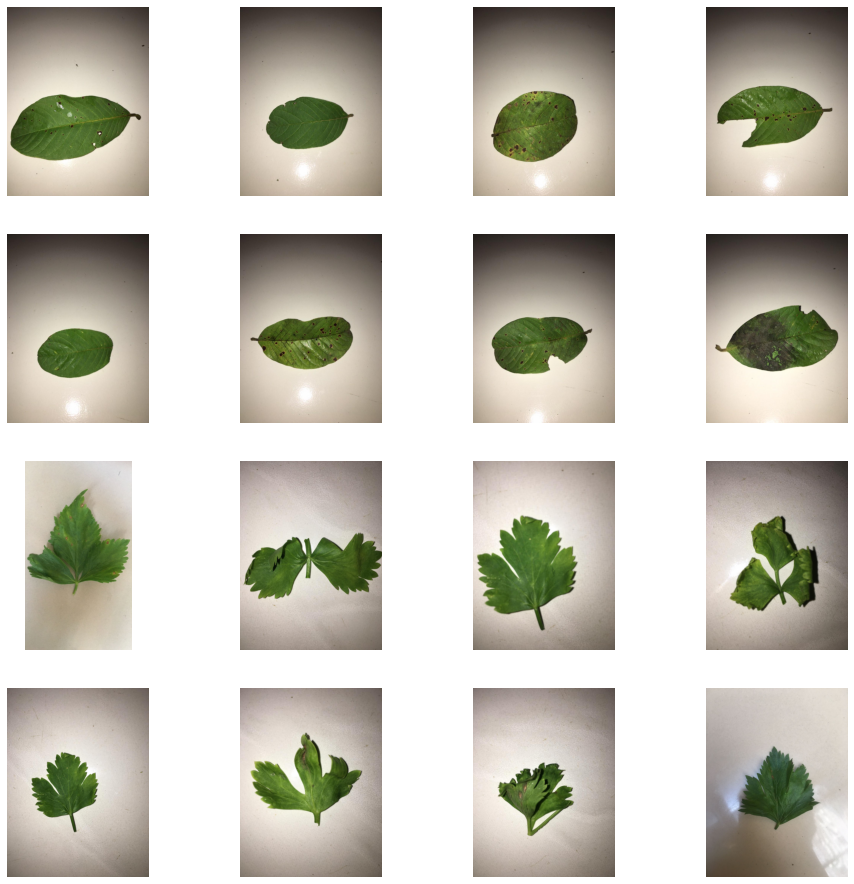

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jambu_pix = [os.path.join(train_jambu_dir, fname) 
                for fname in os.listdir(train_jambu_dir)[pic_index-8:pic_index]]
next_seledri_pix = [os.path.join(train_seledri_dir, fname) 
                for fname in os.listdir(train_seledri_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jambu_pix+next_seledri_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (100, 50, 50, 3)
Train Label =  (100,)
Validation Data =  (20, 50, 50, 3)
Validation Label =  (20,)


In [ ]:
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [204 215 222]
Data setelah di-normalisasi  [0.8        0.84313726 0.87058824]


In [ ]:
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:10])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1:10])

Label sebelum di-encoder  ['daun_seledri' 'daun_seledri' 'daun_seledri' 'daun_seledri'
 'daun_seledri' 'daun_seledri' 'daun_seledri' 'daun_seledri'
 'daun_seledri']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(50, 50, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 flatten_4 (Flatten)         (None, 7500)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               960128    
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 960,257
Trainable params: 960,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
5/5 [==============================] - 1s 47ms/step - loss: 1.5908 - acc: 0.6300 - val_loss: 0.5247 - val_acc: 0.8000
Epoch 2/20
5/5 [==============================] - 0s 14ms/step - loss: 0.3796 - acc: 0.8400 - val_loss: 0.1424 - val_acc: 0.9000
Epoch 3/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1743 - acc: 0.8900 - val_loss: 0.1217 - val_acc: 0.9000
Epoch 4/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0978 - acc: 0.9600 - val_loss: 0.1119 - val_acc: 0.9500
Epoch 5/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0874 - acc: 0.9500 - val_loss: 0.0802 - val_acc: 0.9500
Epoch 6/20
5/5 [==============================] - 0s 13ms/step - loss: 0.0876 - acc: 0.9700 - val_loss: 0.0667 - val_acc: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1157 - acc: 0.9400 - val_loss: 0.0779 - val_acc: 0.9500
Epoch 8/20
5/5 [==============================] - 0s 13ms/step - loss: 0.1653 - acc: 0.9200 - val

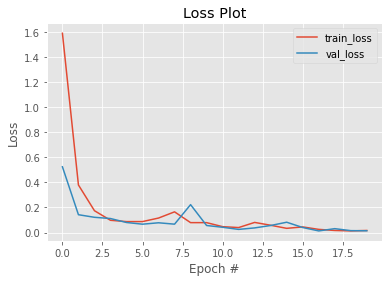

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

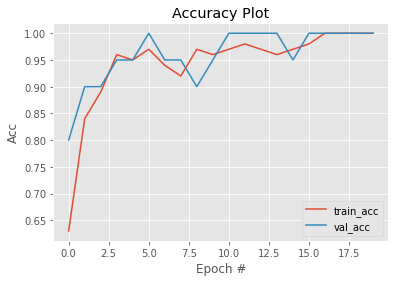

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()